In [10]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [11]:
# Load the configuration from config.json
with open('config.json', 'r') as f:
    config = json.load(f)

start_date = config['START_DATE']
end_date = config['END_DATE']
stocks = config['STOCKS']

In [12]:
# Generate a date range from START_DATE to END_DATE
date_range = pd.date_range(start=start_date, end=end_date)

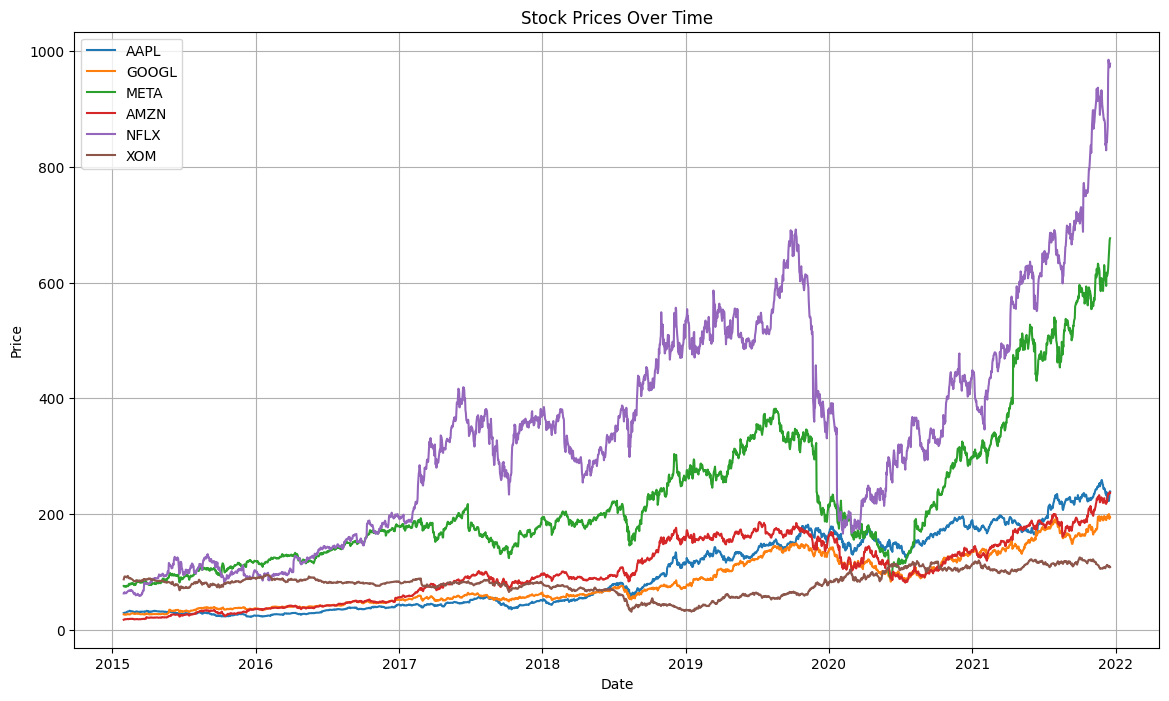

In [13]:
# Plot each stock's data
plt.figure(figsize=(14, 8))

for stock in stocks:
    # Load the stock data from the corresponding .txt file
    with open(f'InputData/{stock}.txt', 'r') as f:
        stock_data = [float(line.strip()) for line in f.readlines()]
    
    # Ensure the stock data length matches the date range
    min_length = min(len(stock_data), len(date_range))
    if len(stock_data) != len(date_range):
        print(f"Warning: {stock} data length ({len(stock_data)}) does not match date range length ({len(date_range)}). Trimming to match the shorter length.")
    
    # Trim the data to match the shorter length
    stock_data = stock_data[:min_length]
    trimmed_date_range = date_range[:min_length]
    
    # Create a DataFrame for the stock
    stock_df = pd.DataFrame({
        'Date': trimmed_date_range,
        'Price': stock_data
    })
    
    # Plot the stock data
    plt.plot(stock_df['Date'], stock_df['Price'], label=stock)

# Add labels and legend
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()